<a href="https://colab.research.google.com/github/amanichivilkar/Airbnb-Booking-Analysis/blob/main/Amani_Chivilkar_M1W4_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>
 
<b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>
 
<b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###Import Libraries



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

### Get the Dataset path file

In [63]:
df=pd.read_csv("/content/drive/MyDrive/data/Copy of Airbnb NYC 2019.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Understanding the column of the DataFrame

 Columns of the DataFrame

* **Id-** Whenever a host list its property on Airbnb, a unique id is created, since every id is unique there are 458895 unique id 
* **name-** It is the property description. Two properties can have the same name, but they are not the same property, every property in the data are unique, as all of them are having different longitude and latitude, that means every properties are situated in different location. 
* **host_id-** Its the identity id given to individual host (For example- two different host cant have the same host_id). So if we want to count the number of host, we count the unique host_id.
* **neighbourhood_group-** This are the 5 Boroughs of New York city, in which the property is located.
* **neighbourhood-**  This are the towns and villages in New York
* **room_type- ** Types of properties 
* **price-**  Property price
* **minimum_nights-** It is the minimum number of night you can book a property,( example-1 year rental contract)
* **number_of_reviews-** Total number of reviews 
* **Calculated_host_listing_count-** The number of times the host has listed its property.
* **availabilitty_365-** the number of days the property were available for booking.


## **Cleaning the data**



### **Check how many NaN values are present in each columns**

In [64]:
 df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


* Drop the column which are not required,like id, last_review  
* Since 2 different host can have the same host_name, we use host_id , as host id is unique for induvidual host


In [65]:
df.drop(['id','last_review'],axis=1,inplace=True)

###  **Fill the NaN values in host_name by 'no name'**

In [66]:
df.loc[df.host_name.isna(),'host_name']=df.loc[df.host_name.isna(),'host_name'].apply(lambda x: "no name")

### **Replace NaN values in 'name' column by 'no description'**

In [67]:
df.loc[df.name.isna(),'name']=df.loc[df.name.isna(),'name'].apply(lambda x: "no description")

### **If price is 0 , replace it by the average price of all similar room_type with similar neighbourhood_group**





In [68]:
#Considering 3 column of the dataframe df
df1=df[['neighbourhood_group','room_type','price']]

#Create dataframe df2 containig price greater than zero
df2=df1[df1.price!=0]

# groupby neighbourhood_group and room_type, And find there average price 
df3=df2.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
df3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [69]:
# Creat function to extract average price from dataframe df3
def fun(neighbourhood_group,room_type):
 avg_price=df3.loc[neighbourhood_group,room_type]
 return avg_price

In [70]:
# Repllace 0 price by the average price from the dataframe df3
df['price']=df.apply(lambda x: fun(x['neighbourhood_group'],x['room_type'])  if x['price']==0 else x['price'], axis=1 )

In [71]:
display(df.price.describe()),display(df.info())

count    48895.00000
mean       152.74227
std        240.14635
min         10.00000
25%         69.00000
50%        106.00000
75%        175.00000
max      10000.00000
Name: price, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  float64
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

None

(None, None)

## **EDA and Visualization Analysis**

**define busiest host**
I would consider the host to be busy, if he frequently receives bookings (that is if the host recives booking  in higher rate).
Since we have not been provided with the booking data, we can consider the number of reviews received  by the host as the minimum number of booking that a host could get. (since the tenants gives review after booking/using the property)

* host with maximum number of reviews is not busiest, but host with max number of reviews per month is the busiest.
* For example host1 gets 10 booking per month is more busier than the host2 who gets 2 booking per month. 
* In the given data Maya has the highest number of reviews that is 2273 reviews. but the rate of reviews is 53 reviews per month, where as Soder got 1281 reviews , and the rate of reviews is 397 reviews per month , means Sonders booking rate is more than Maya hence Sonder is the busiest among all. 

### 1. Top 5 host with the heighest reviews per month.

In [72]:
df6=df.groupby(['host_id','host_name']).agg({'reviews_per_month':'sum'}).reset_index().sort_values('reviews_per_month', ascending=False).head()
df6

,host_id,host_name,reviews_per_month
34646,219517861,Sonder (NYC),397.56
35825,244361589,Row NYC,111.72
35407,232251881,Lakshmee,80.63
18636,26432133,Danielle,68.02
31070,137274917,David,62.89


###  All about the top 5 host with max number of reviews on Airbnb



In [83]:
df1=df[(df.host_id==219517861)|(df.host_id==244361589)|(df.host_id==232251881)|(df.host_id==26432133)|(df.host_id==137274917)]
df1.groupby(['host_id','host_name','room_type','neighbourhood_group']).agg({'price':'mean','minimum_nights':'median','number_of_reviews':'sum','reviews_per_month':'sum','calculated_host_listings_count':'count'}).reset_index()

,host_id,host_name,room_type,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,26432133,Danielle,Private room,Queens,49.500000,1,1793,60.06,4
1,26432133,Danielle,Shared room,Queens,38.000000,1,224,7.96,1
2,137274917,David,Private room,Manhattan,110.000000,1,607,62.89,12
3,219517861,Sonder (NYC),Entire home/apt,Manhattan,251.912226,2,1224,382.65,319
4,219517861,Sonder (NYC),Private room,Manhattan,304.375000,2,57,14.91,8
5,232251881,Lakshmee,Private room,Queens,57.000000,1,296,50.90,5
6,232251881,Lakshmee,Shared room,Queens,39.333333,1,186,29.73,3
7,244361589,Row NYC,Private room,Manhattan,205.000000,1,305,111.72,9


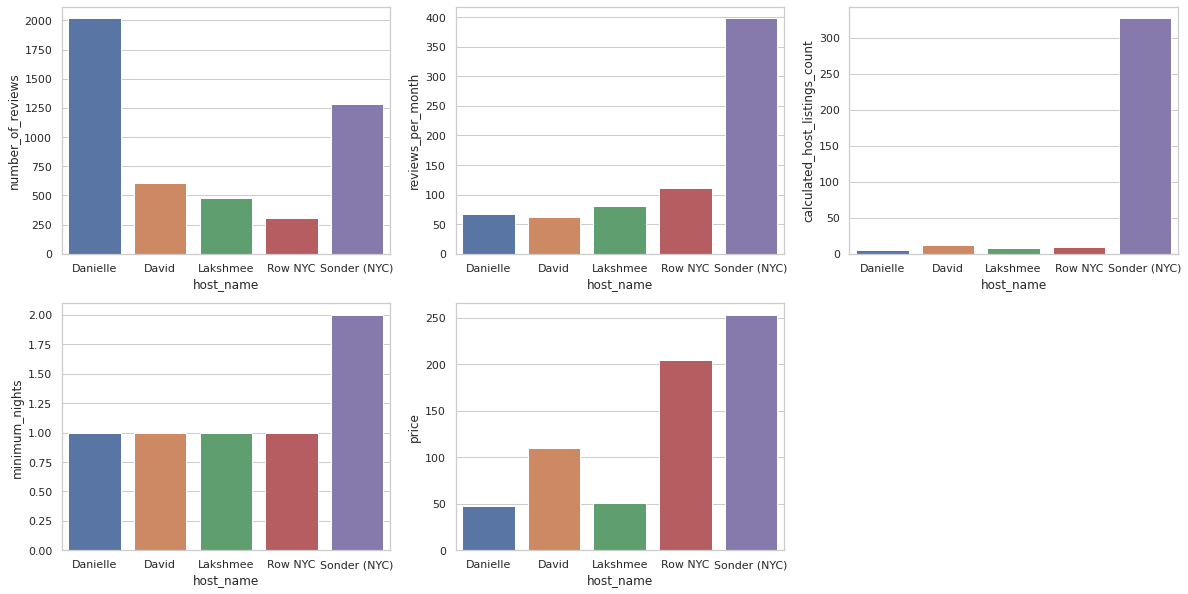

In [84]:
df2=df1.groupby(['host_name'])['calculated_host_listings_count'].count().reset_index()
df3=df1.groupby(['host_name'])['number_of_reviews'].sum().reset_index()
df4=df1.groupby(['host_name'])['minimum_nights'].median().reset_index()
df5=df1.groupby(['host_name'])['price'].mean().reset_index()
df6=df1.groupby(['host_name'])['reviews_per_month'].sum().reset_index()

plt.figure(figsize=(20,10))

plt.subplot(2,3,2)
sns.barplot(x=df6.host_name, y=df6.reviews_per_month)

plt.subplot(2,3,3)
sns.barplot(x=df2.host_name, y=df2.calculated_host_listings_count)

plt.subplot(2,3,1)
sns.barplot(x=df3.host_name, y=df3.number_of_reviews)

plt.subplot(2,3,4)
sns.barplot(x=df4.host_name, y=df4.minimum_nights)

plt.subplot(2,3,5)
sns.barplot(x=df5.host_name, y=df5.price)

* Sonder has the highest review per month, highest listing count, most of his properties are in Manhattan which is the most desly populated among the 5 boroughs of New Yorl city. Hence Sonder is the bussiest host.

* Most of his pro perties are entire home/apt, with an average price of 251$ and the minimum_night stay is 2 nights.

### **Does review depends upon listing count?**

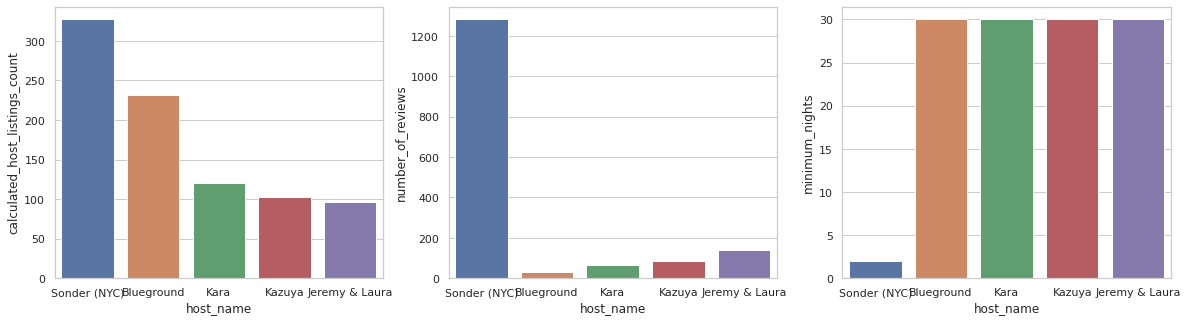

In [75]:
#Top 5 host with max number of listing
df1=df.groupby(['host_id','host_name']).agg({'calculated_host_listings_count':'count','number_of_reviews':'sum','minimum_nights':'median'}).reset_index().sort_values('calculated_host_listings_count', ascending=False).head()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(x=df1.host_name, y=df1.calculated_host_listings_count)

plt.subplot(1,3,2)
sns.barplot(x=df1.host_name, y=df1.number_of_reviews)

plt.subplot(1,3,3)
sns.barplot(x=df1.host_name, y=df1.minimum_nights)

* inspite of Blueground having the second highest review, he has got very less reviews among all, that is because the minimum night required to book Blueground's property is 30 nights. where as for Sonder is 2 nights,

* Scaterplot below shows the relation between minimum_nights and total_reviews of all the host

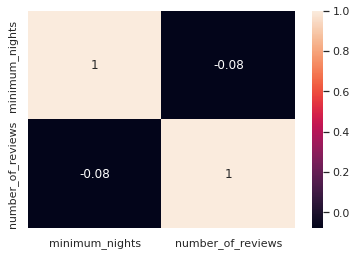

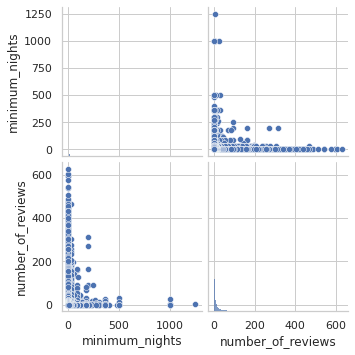

In [76]:
h=df[['minimum_nights','number_of_reviews']]
corr_h=h.corr()
sns.heatmap(corr_h,annot=True)
sns.pairplot(h)

### ***Number and Percentage of Properties, listed on Airbnb***

[Text(0.5, 1.0, 'Number of different property types in different neighbourhood_group')]

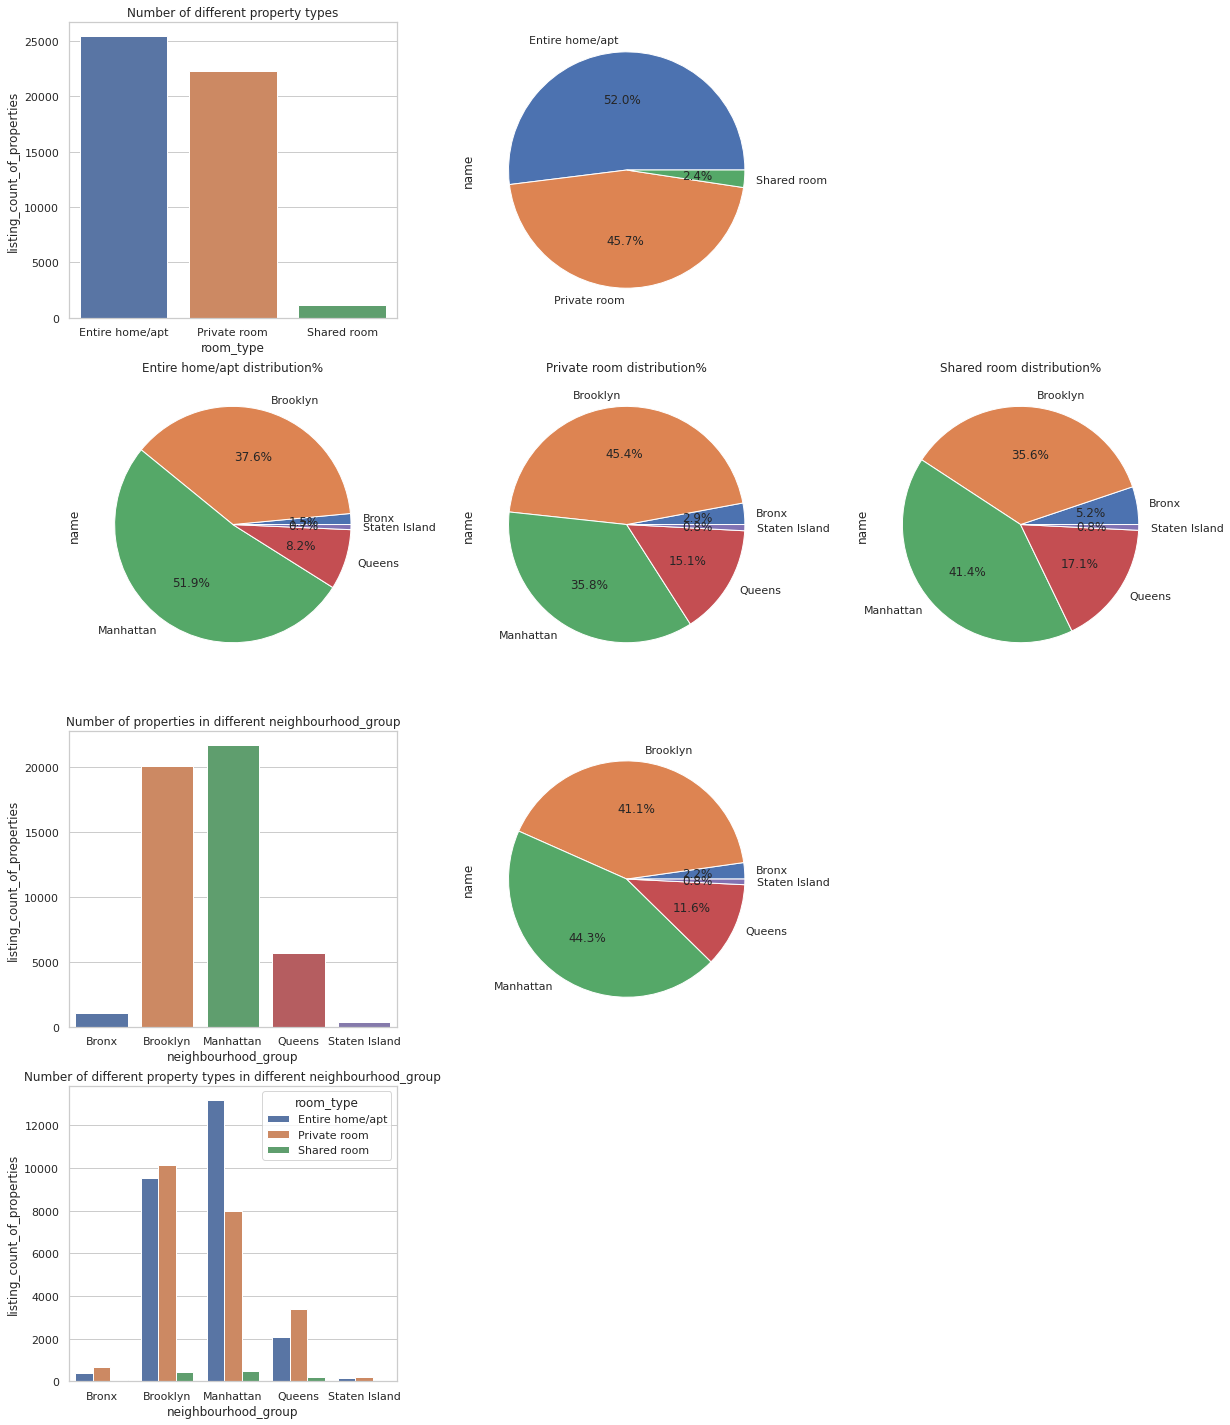

In [77]:
 
plt.figure(figsize=(20,25))
 
df1=df.groupby(['room_type'])['name'].count().reset_index().rename(columns={'name':'listing_count_of_properties'})
df7=df.groupby(['room_type'])['name'].count()
df4=df.groupby(['neighbourhood_group'])['name'].count().reset_index().rename(columns={'name':'listing_count_of_properties'})
df5=df.groupby(['neighbourhood_group'])['name'].count()
df6=df.groupby(['neighbourhood_group','room_type'])['name'].count().reset_index().rename(columns={'name':'listing_count_of_properties'})
 
plt.subplot(4,3,1)
sns.barplot(x=df1.room_type, y=df1.listing_count_of_properties).set(title='Number of different property types')
plt.subplot(4,3,2)
df7.plot.pie(autopct="%.1f%%")
 
i=4
for room in ['Entire home/apt','Private room', 'Shared room']:
  df2=df[df.room_type==room] 
  df3=df2.groupby(['neighbourhood_group'])['name'].count()
 
  plt.subplot(4,3,i)
  plt.title(f'{room} distribution%')
  df3.plot.pie(autopct="%.1f%%")
  i=i+1
 
plt.subplot(4,3,7)
sns.barplot(x=df4.neighbourhood_group, y=df4.listing_count_of_properties).set(title='Number of properties in different neighbourhood_group')
plt.subplot(4,3,8)
df5.plot.pie(autopct="%.1f%%")

 
plt.subplot(4,3,10)
sns.barplot(x=df6.neighbourhood_group, y=df6.listing_count_of_properties, hue=df6.room_type).set(title='Number of different property types in different neighbourhood_group')

### ***Average price of Properties***

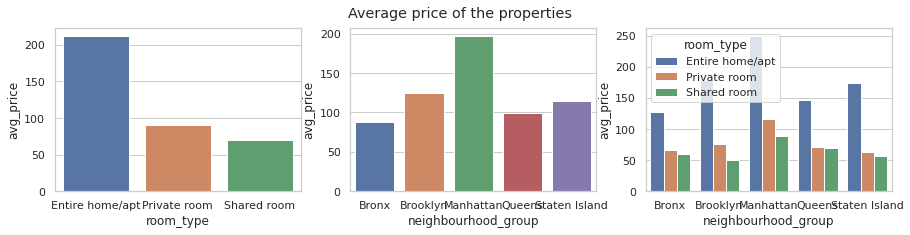

In [78]:
df1=df.groupby(['room_type'])['price'].mean().reset_index().rename(columns={'price':'avg_price'})
df2=df.groupby(['neighbourhood_group'])['price'].mean().reset_index().rename(columns={'price':'avg_price'})
df3=df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index().rename(columns={'price':'avg_price'})

fig, ax=plt.subplots(1,3,figsize=(15,3))
fig.suptitle('Average price of the properties') 

sns.barplot(ax=ax[0],x=df1.room_type, y=df1.avg_price)
# ax[0].set_title('Avg price of different room_type in different neighbourhood_group')
 
sns.barplot(ax=ax[1],x=df2.neighbourhood_group, y=df2.avg_price)
# ax[1].set_title('Avg price of different room_type in different neighbourhood_group')

sns.barplot(ax=ax[2],x=df3.neighbourhood_group, y=df3.avg_price, hue=df3.room_type)
# ax[2].set_title('Avg price of different room_type in different neighbourhood_group')


In [79]:
display(df1),display(df2),display(df3)

,room_type,avg_price
0,Entire home/apt,211.811075
1,Private room,89.804540
2,Shared room,70.215127


,neighbourhood_group,avg_price
0,Bronx,87.558104
1,Brooklyn,124.419974
2,Manhattan,196.887321
3,Queens,99.517649
4,Staten Island,114.812332


,neighbourhood_group,room_type,avg_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
5,Brooklyn,Shared room,50.773723
6,Manhattan,Entire home/apt,249.257994
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


(None, None, None)

###***Overall Correlation with Price***

 Check weather 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' has any correlation with price

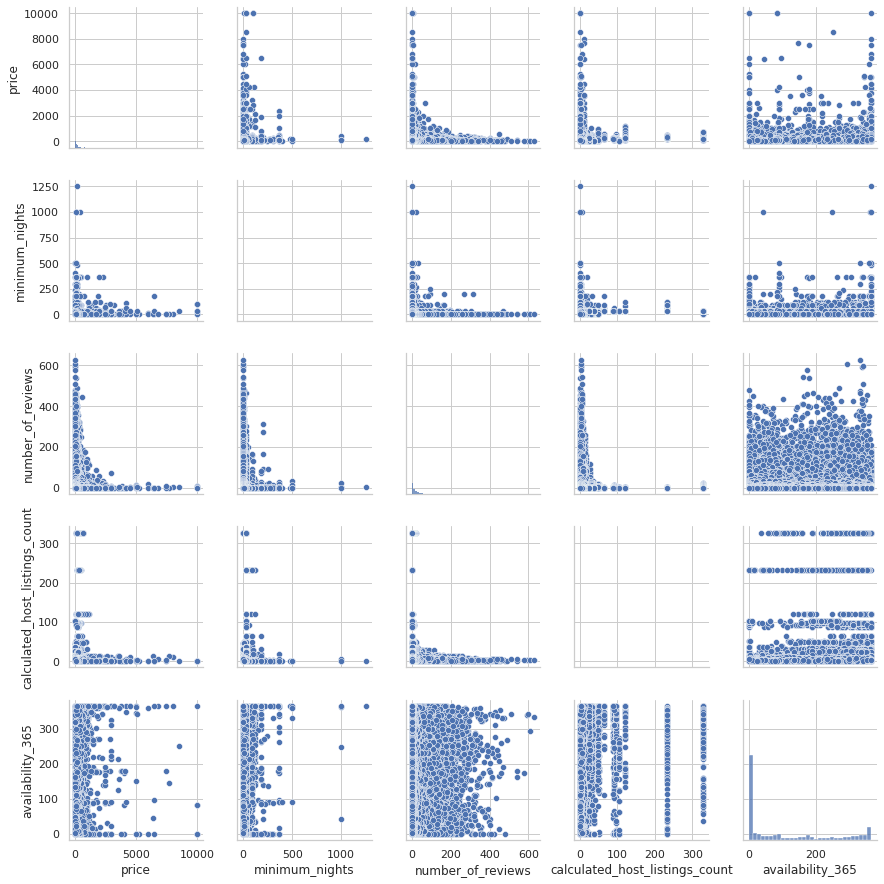

In [80]:
df1=df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
# corr_df1=df1.corr()
# sns.heatmap(corr_df1,annot=True)
sns.pairplot(df1)

There does not exist any usefull correlation